In [2]:
!pip install mlxtend

In [ ]:
!pip install scikit-learn # if we dont have sklearn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [5]:
X, y = make_blobs(centers=[[1,1],[2,2]],random_state=1)

In [11]:
df=pd.DataFrame(X,columns=['feature1','feature2']).assign(label=y)
df.head(10)

,feature1,feature2,label
0,0.471828,-0.072969,0
1,1.889553,1.382638,1
2,2.520576,0.855659,1
3,1.819080,1.396079,1
4,4.190700,0.103639,1
5,2.792807,1.376469,1
6,1.733781,2.032615,1
7,1.121821,2.129484,0
8,1.042214,1.582815,0
9,2.248799,1.703359,1


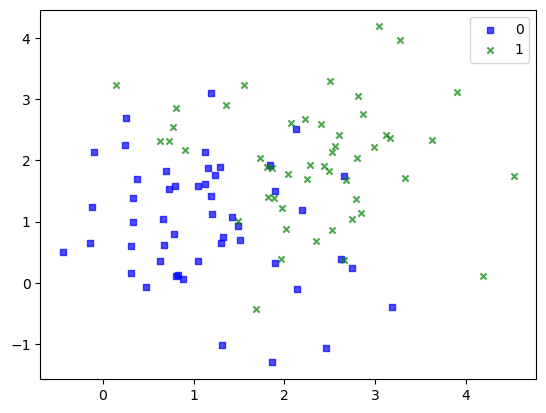

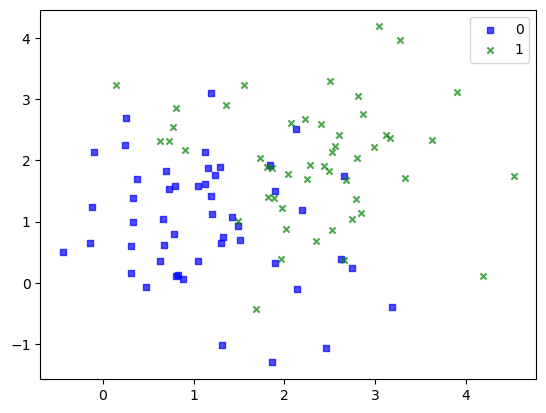

In [12]:
category_scatter(x='feature1',y='feature2',label_col='label', data=df) # we can draw a single line to 
#divide two category one above and one below 

<Axes: >

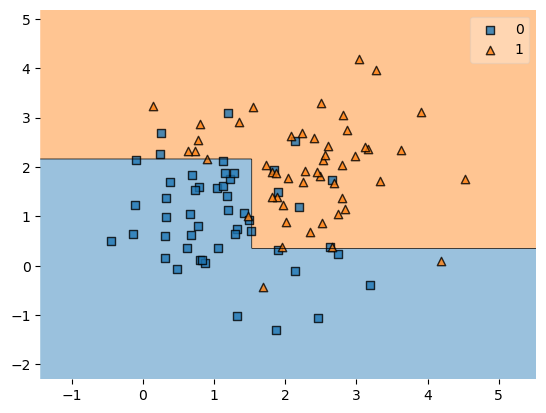

In [13]:
d_tree = DecisionTreeClassifier(max_depth=2) # we are just calling the algorthem and tuning the parameter 

d_tree.fit(X,y) # Traing the Model here on training Data and finally we get model

plot_decision_regions(X,y , clf=d_tree)


### Titanic Dataset

In [14]:
titanic = pd.read_csv('https://weclouddata.s3.amazonaws.com/data/titanic.csv')

In [15]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Data Exploration

In [20]:
titanic.shape
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1308 non-null   int64  
 1   survived   1308 non-null   int64  
 2   name       1308 non-null   object 
 3   sex        1308 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1308 non-null   int64  
 6   parch      1308 non-null   int64  
 7   ticket     1308 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1306 non-null   object 
 11  boat       486 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1308.000000,1308.000000,1045.000000,1308.000000,1308.000000,1308.000000,120.000000
mean,2.294343,0.382263,29.851834,0.499235,0.385321,33.295479,159.975000
std,0.837929,0.486126,14.389201,1.041965,0.865826,51.758668,97.672103
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,71.500000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,154.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,255.250000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<Axes: >

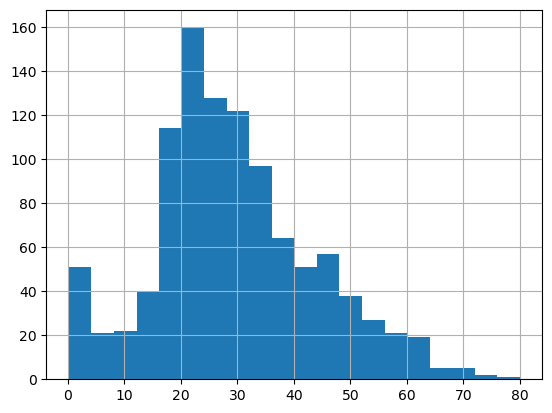

In [21]:
# Histogram for frequency Distribution
# We can use Log Tranformation if we want someting mormally distributed 
titanic['age'].hist(bins=20)

### Handling Missing Values

In [22]:
#Missing value Handling
titanic.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
dtype: int64

In [25]:
avg_age = titanic['age'].mean()
titanic['age']=titanic['age'].fillna(avg_age)
titanic['age']

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1303    14.500000
1304    29.851834
1305    26.500000
1306    27.000000
1307    29.000000
Name: age, Length: 1308, dtype: float64

In [26]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
dtype: int64

### Slecting Features

In [27]:
features = ['pclass','age','fare','sibsp','parch']

### Make Feature Dataset

In [29]:
X = titanic[['pclass','age','fare','sibsp','parch']]

## Make Label

In [32]:
y=titanic['survived']
y

0       1
1       1
2       0
3       0
4       0
       ..
1303    0
1304    0
1305    0
1306    0
1307    0
Name: survived, Length: 1308, dtype: int64

<Axes: >

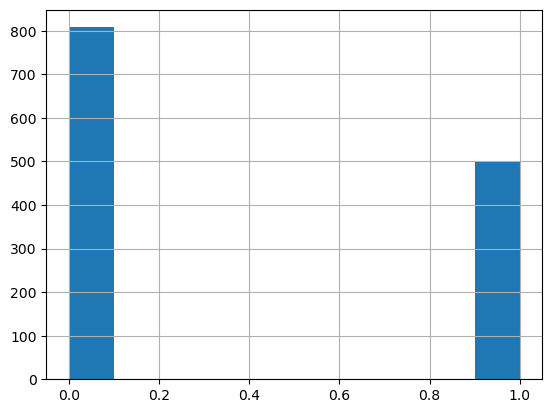

In [33]:
y.hist()

### Make test Dataset
  - train-test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [35]:
X_train.shape

(876, 5)

In [36]:
X_test.shape

(432, 5)

In [37]:
y_train.shape

(876,)

### Build and train Model

In [40]:
tree = DecisionTreeClassifier(max_depth=3)

#Trains the tree 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Model Prediction

In [43]:
 y_pred = tree.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [45]:
y_test.values

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,

### Model Evaluation

In [47]:
accuracy_score(y_test,y_pred)

0.7222222222222222

### Variable Importance 
 -- Features Importamt 

In [48]:
features

['pclass', 'age', 'fare', 'sibsp', 'parch']

In [50]:
tree.feature_importances_

array([0.56689642, 0.20064851, 0.23245507, 0.        , 0.        ])

In [52]:
list(zip(features,tree.feature_importances_))

[('pclass', 0.5668964210892092),
 ('age', 0.20064851163050798),
 ('fare', 0.23245506728028276),
 ('sibsp', 0.0),
 ('parch', 0.0)]

In [56]:
feature_importance=pd.DataFrame(list(zip(features,tree.feature_importances_)),columns=['Feature','Important_Feature'])
feature_importance

,Feature,Important_Feature
0,pclass,0.566896
1,age,0.200649
2,fare,0.232455
3,sibsp,0.000000
4,parch,0.000000


In [58]:
feature_importance.set_index('Feature',inplace=True)

<Axes: xlabel='Feature'>

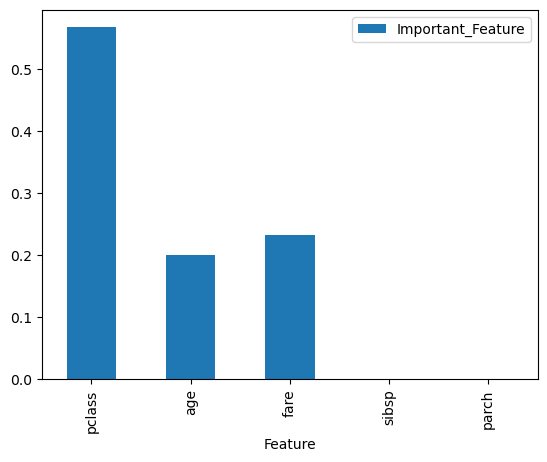

In [59]:
feature_importance.plot(kind='bar')